In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


# 2D Rectilinear Mesh
This 2D rectilinear mesh defines a grid with straight cell boundaries.

It can be instantiated in two ways.

The first is by providing the cell centres or
cell edges in two dimensions.

The second embeds the 2D mesh in 3D by providing the cell centres or edges in three dimensions.
The first two dimensions specify the mesh coordinates in the horiztontal cartesian plane
while the third discretizes in depth. This allows us to characterize a mesh whose horizontal coordinates
do not follow a line that is parallel to either the "x" or "y" axis.


In [2]:
from geobipy import StatArray
from geobipy import RectilinearMesh2D
import matplotlib.pyplot as plt
import numpy as np

Specify some cell centres in x and y



In [3]:
x = StatArray(np.cumsum(np.arange(10.0)), 'Easting', 'm')
y = StatArray(np.cumsum(np.arange(10.0)), 'Northing', 'm')
rm = RectilinearMesh2D(xCentres=x, yCentres=y)

We can plot the grid lines of the mesh.



<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/Users/nfoks/miniconda3/envs/geobipy/lib/python3.8/site-packages/matplotlib/colors.py:1159: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


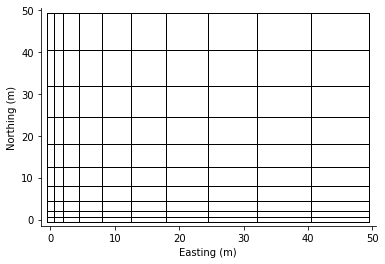

In [4]:
plt.figure()
_  = rm.plotGrid(linewidth=0.5)

## 2D Mesh embedded in 3D



In [ ]:
z = StatArray(np.cumsum(np.arange(15.0)), 'Depth', 'm')
rm = RectilinearMesh2D(xCentres=x, yCentres=y, zCentres=z)

Plot the x-y coordinates of the mesh



In [ ]:
plt.figure()
_ = rm.plotXY()

Again, plot the grid. This time the z-coordinate dominates the plot.



In [ ]:
plt.figure()
_ = rm.plotGrid(xAxis='r', flipY=True, linewidth=0.5)

We can pcolor the mesh by providing cell values.



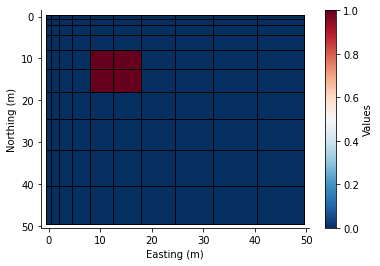

In [8]:
xx, yy = np.meshgrid(rm.x.centres, rm.z.centres)
arr = StatArray(np.sin(np.sqrt(xx ** 2.0 + yy ** 2.0)), "Values")
arr[:, :] = 0.0
arr[4:6, 4:6] = 1.0

plt.figure()
_ = rm.pcolor(arr, xAxis='x', grid=True, flipY=True, linewidth=0.5, cmap='RdBu_r')

[1.         0.70710678 0.57735027 0.5        0.4472136  0.40824829
 0.37796447 0.35355339 0.33333333]


(<AxesSubplot:>,
 <matplotlib.colorbar.Colorbar at 0x16ae5d370>)

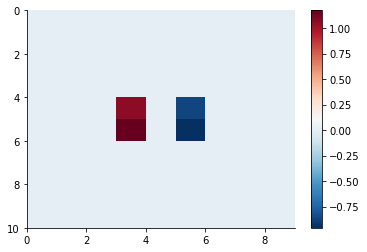

In [9]:
Wx = rm.xGradientMatrix()
plt.figure()
StatArray((Wx * arr.flatten()).reshape(rm.shape[0], rm.shape[1]-1)).pcolor(flipY=True, cmap='RdBu_r')

In [10]:
Wz = rm.zGradientMatrix()

(<AxesSubplot:>,
 <matplotlib.colorbar.Colorbar at 0x16af739d0>)

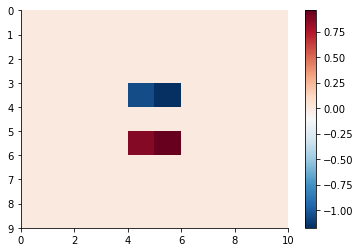

In [11]:
StatArray(Wz * arr.flatten()).reshape(rm.shape[0]-1, rm.shape[1]).pcolor(flipY=True, cmap='RdBu_r')

We can perform some interval statistics on the cell values of the mesh
Generate some values



In [ ]:
a = np.repeat(np.arange(1.0, np.float(rm.x.nCells+1))[:, np.newaxis], rm.z.nCells, 1).T

Compute the mean over an interval for the mesh.



In [ ]:
rm.intervalStatistic(a, intervals=[6.8, 12.4], axis=0, statistic='mean')

Compute the mean over multiple intervals for the mesh.



In [ ]:
rm.intervalStatistic(a, intervals=[6.8, 12.4, 20.0, 40.0], axis=0, statistic='mean')

We can specify either axis



In [ ]:
rm.intervalStatistic(a, intervals=[2.8, 4.2], axis=1, statistic='mean')

In [ ]:
rm.intervalStatistic(a, intervals=[2.8, 4.2, 5.1, 8.4], axis=1, statistic='mean')

rm.toVTK('test', cellData=StatArray(np.random.randn(z.size, x.size), "Name"))



In [ ]:
import h5py
with h5py.File('rm2d.h5', 'w') as f:
    rm.createHdf(f, 'test')
    rm.writeHdf(f, 'test')

with h5py.File('rm2d.h5', 'r') as f:
    rm2 = RectilinearMesh2D().fromHdf(f['test'])

In [6]:
from geobipy import Histogram2D
x = StatArray(np.arange(100.0), 'Easting', 'm')
y = StatArray(np.arange(100.0), 'Northing', 'm')
rm = Histogram2D(xBinCentres=x, yBinCentres=y)

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/Users/nfoks/miniconda3/envs/geobipy/lib/python3.8/site-packages/matplotlib/colors.py:1159: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


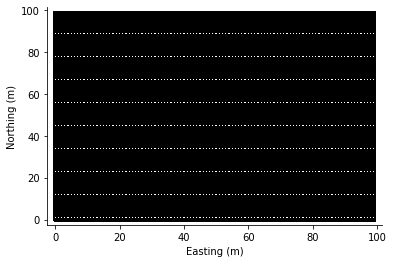

In [7]:
plt.figure()
rm.plotGrid()

In [20]:
np.logspace(-5, -1, 100)

array([1.00000000e-05, 1.09749877e-05, 1.20450354e-05, 1.32194115e-05,
       1.45082878e-05, 1.59228279e-05, 1.74752840e-05, 1.91791026e-05,
       2.10490414e-05, 2.31012970e-05, 2.53536449e-05, 2.78255940e-05,
       3.05385551e-05, 3.35160265e-05, 3.67837977e-05, 4.03701726e-05,
       4.43062146e-05, 4.86260158e-05, 5.33669923e-05, 5.85702082e-05,
       6.42807312e-05, 7.05480231e-05, 7.74263683e-05, 8.49753436e-05,
       9.32603347e-05, 1.02353102e-04, 1.12332403e-04, 1.23284674e-04,
       1.35304777e-04, 1.48496826e-04, 1.62975083e-04, 1.78864953e-04,
       1.96304065e-04, 2.15443469e-04, 2.36448941e-04, 2.59502421e-04,
       2.84803587e-04, 3.12571585e-04, 3.43046929e-04, 3.76493581e-04,
       4.13201240e-04, 4.53487851e-04, 4.97702356e-04, 5.46227722e-04,
       5.99484250e-04, 6.57933225e-04, 7.22080902e-04, 7.92482898e-04,
       8.69749003e-04, 9.54548457e-04, 1.04761575e-03, 1.14975700e-03,
       1.26185688e-03, 1.38488637e-03, 1.51991108e-03, 1.66810054e-03,
      

In [14]:
rm.update_line([1.0, 8.0, 20.0, 50.0], [1.0, 6.0, 5.0, 50.0])

(<AxesSubplot:xlabel='Easting (m)', ylabel='Northing (m)'>,
 <matplotlib.colorbar.Colorbar at 0x12c5417f0>)

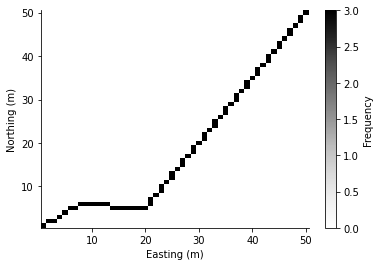

In [15]:
plt.figure()
rm.pcolor()

In [85]:
from geobipy import Model
arr = Model(mesh=rm)

In [86]:
arr.values[iy, ix] += 1.0

(<AxesSubplot:xlabel='Easting (m)', ylabel='Northing (m)'>,
 <matplotlib.colorbar.Colorbar at 0x12b485ca0>)

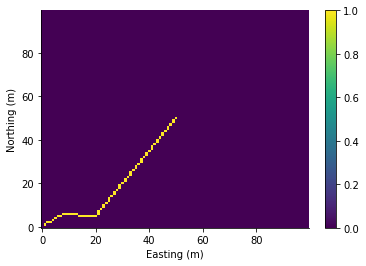

In [87]:
plt.figure()
arr.pcolor()